<a href="https://colab.research.google.com/github/JABINOGANGA/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_24_Jabin_Oganga_Autolib_Data_EDA_-_Hypothes/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_24_Jabin_Oganga_Autolib_Data_EDA_%26_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELECTRIC CAR UTILITY IN AUTOLIB CAR SHARING COMPANY

## Overview

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. 

**The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.** 

### To work on this project, we will perform the following analysis with Python; 

* Find and deal with outliers, anomalies, and missing data within the dataset.
* Plot appropriate univariate and bivariate summaries recording our observations.
* Implement the solution by performing hypothesis testing.
* This will need to be documented when writing the report. 

## 2. Loading Libraries

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#import norm function from the scipy library
from scipy.stats import norm


## 2. Loading DataSets

In [ ]:
# Load the Autolib Dataset then check the datasets
autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv',encoding='latin-1')
autolib.head()

,ï»¿Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Load the Autolib Description Dataset to help understand the columns
autolib_Desc = pd.read_excel('/content/columns_explanation (1).xlsx')
autolib_Desc

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## 3. Checking our Data

In [ ]:
# Determining the no. of records in our dataset, name of columns & data types
#
def info(data):
  dtype = data.dtypes
  dshape = data.shape
  dcolumns = data.columns

  return dtype, dcolumns , dshape

info(autolib)

(ï»¿Postal code             int64
 date                      object
 n_daily_data_points        int64
 dayOfWeek                  int64
 day_type                  object
 BlueCars_taken_sum         int64
 BlueCars_returned_sum      int64
 Utilib_taken_sum           int64
 Utilib_returned_sum        int64
 Utilib_14_taken_sum        int64
 Utilib_14_returned_sum     int64
 Slots_freed_sum            int64
 Slots_taken_sum            int64
 dtype: object,
 Index(['ï»¿Postal code', 'date', 'n_daily_data_points', 'dayOfWeek',
        'day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
        'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum',
        'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
       dtype='object'),
 (16085, 13))

## 4. Tidying Our DataSet


In [ ]:
#Checking missing Values using function 

def missing(data_set):
  slot = data_set.isnull().sum().sort_values(ascending = False)
# finding the percentage
  perc = (data_set.isnull().sum()/len(data_set)).sort_values(ascending = False)
  miss_values = pd.DataFrame({'Total Missing Values':slot, 'percentage':perc})
  return miss_values 




In [ ]:
missing (autolib)
# The dataset has no missing values

,Total Missing Values,percentage
Slots_taken_sum,0,0.0
Slots_freed_sum,0,0.0
Utilib_14_returned_sum,0,0.0
Utilib_14_taken_sum,0,0.0
Utilib_returned_sum,0,0.0
Utilib_taken_sum,0,0.0
BlueCars_returned_sum,0,0.0
BlueCars_taken_sum,0,0.0
day_type,0,0.0
dayOfWeek,0,0.0


In [ ]:
# Dropping the unecessary columns in our dataset
autolib.drop(columns=['n_daily_data_points'] , inplace= True, axis = 1)

In [ ]:
autolib.head()

,ï»¿Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Changing format of columns date column from format interger to datetime
autolib['date'] =pd.to_datetime(autolib['date'] ) 
autolib['date']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: date, Length: 16085, dtype: datetime64[ns]

In [ ]:
# Renaming the columns of the dataset to look presentable
autolib.rename(columns={"ï»¿Postal code": "PostalCode", "date": "Date", "day_type": "Day_type" }, errors="raise", inplace= True)

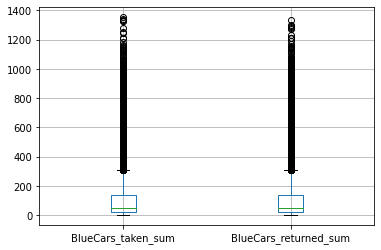

In [ ]:
# Checking for Outliers
#Let's start with the Bluecars_taken 
boxplot = autolib.boxplot(column=['BlueCars_taken_sum', 'BlueCars_returned_sum'])

In [ ]:
#Removing outliers in the year column
#Calculate quantiles


blue_uq  = autolib['BlueCars_taken_sum'].quantile([0.75])
print(blue_uq )

blue_lq  = autolib['BlueCars_taken_sum'].quantile([0.25])
print(blue_lq )



# Using the lower and upper quantile to drop the outliers in the blueCars_taken_sum column in order to remain with data which has more accuracy
outliers_upper = autolib[autolib['BlueCars_taken_sum'] > 135].index
autolib.drop(outliers_upper , inplace=True)




0.75    135.0
Name: BlueCars_taken_sum, dtype: float64
0.25    20.0
Name: BlueCars_taken_sum, dtype: float64


In [ ]:
# Using the lower and upper quantile to drop the outliers in the blueCars_taken_sum column in order to remain with data which has more accuracy
outliers_lower = autolib[autolib['BlueCars_taken_sum'] < 20].index
autolib.drop(outliers_lower , inplace=True)

In [ ]:
#Removing outliers in the year column
#Calculate quantiles


blue_uq  = autolib['BlueCars_returned_sum'].quantile([0.75])
print(blue_uq )

blue_lq  = autolib['BlueCars_returned_sum'].quantile([0.25])
print(blue_lq )



# Using the lower and upper quantile to drop the outliers in the blueCars_taken_sum column in order to remain with data which has more accuracy
outliers_upper = autolib[autolib['BlueCars_returned_sum'] > 135].index
autolib.drop(outliers_upper , inplace=True)

0.75    73.0
Name: BlueCars_returned_sum, dtype: float64
0.25    31.0
Name: BlueCars_returned_sum, dtype: float64


In [ ]:
# Using the lower and upper quantile to drop the outliers in the blueCars_taken_sum column in order to remain with data which has more accuracy
outliers_lower = autolib[autolib['BlueCars_returned_sum'] < 20].index
autolib.drop(outliers_lower , inplace=True)

## 5. Exploratory Analysis

#### Measure of Central Tendencies & Dispersion

In [ ]:
# Changing day type column to category from object in order to enable it to be used for plots 
autolib['Day_type'] = autolib['Day_type'].astype('category')


In [ ]:
# Selecting the data on weekdays to work with on the analysis
autolib_wd = autolib.loc[autolib.Day_type == 'weekday']
autolib_wd 

,PostalCode,Date,dayOfWeek,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1,weekday,98,94,1,1,8,8,23,22
3,75001,2018-01-04,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,4,weekday,114,117,3,3,6,6,18,20
7,75001,2018-01-08,0,weekday,84,83,3,3,10,10,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...
16017,95880,2018-04-02,0,weekday,36,31,0,0,0,0,0,0
16046,95880,2018-05-01,1,weekday,24,25,0,0,1,1,0,0
16053,95880,2018-05-08,1,weekday,31,32,4,2,6,6,0,0
16055,95880,2018-05-21,0,weekday,26,27,1,1,1,1,0,0


In [ ]:
# Description of the Blue cars taken sum column 
autolib_wd['BlueCars_taken_sum'].describe()

count    5463.000000
mean       53.769541
std        28.646282
min        20.000000
25%        31.000000
50%        45.000000
75%        71.000000
max       135.000000
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
# Finding the mode of the column 'BlueCars_taken_sum'
autolib_wd['BlueCars_taken_sum'].mode()

0    28
dtype: int64

In [ ]:
# Description of the Blue cars taken sum column 
autolib_wd['BlueCars_returned_sum'].describe()

count    5463.000000
mean       53.888523
std        28.510770
min        20.000000
25%        31.000000
50%        45.000000
75%        70.000000
max       135.000000
Name: BlueCars_returned_sum, dtype: float64

In [ ]:
# Finding the mode of the column 'BlueCars_taken_sum'
autolib_wd['BlueCars_returned_sum'].mode()

0    29
dtype: int64

In [ ]:
#Calculate quantiles
quantile_auto = autolib_wd["BlueCars_taken_sum"].quantile([0.25,0.5,0.75])
print(quantile_auto)


0.25    31.0
0.50    45.0
0.75    71.0
Name: BlueCars_taken_sum, dtype: float64


In [ ]:
#Calculate quantiles
quantile_auto = autolib_wd["BlueCars_returned_sum"].quantile([0.25,0.5,0.75])
print(quantile_auto)

0.25    31.0
0.50    45.0
0.75    70.0
Name: BlueCars_returned_sum, dtype: float64


In [ ]:
autolib.drop(columns=['PostalCode', 'dayOfWeek'] , inplace= True, axis = 1)


In [ ]:
#Calculating measures of dispersion
st_dev = autolib['BlueCars_taken_sum'].std()
print(st_dev)
skew =autolib['BlueCars_taken_sum'].skew()
print(skew)
kurt = autolib['BlueCars_taken_sum'].kurtosis()
print(kurt)

28.8894721985134
0.8649116417939993
-0.23263450131150476


In [ ]:
#Calculating measures of dispersion
st_dev = autolib['BlueCars_returned_sum'].std()
print(st_dev)
skew =autolib['BlueCars_returned_sum'].skew()
print(skew)
kurt = autolib['BlueCars_returned_sum'].kurtosis()
print(kurt)

28.915615468014334
0.8872683690421388
-0.17749243286119798



Weekday observation:

The number of Bluecars taken and that returned seems to have a relationship. The mean, mode and Median numbers of cars taken and those returned is the same.

Both distributions (Bluecars taken and Bluecars returned) are highly skewed to the right.

### Univariate Analysis


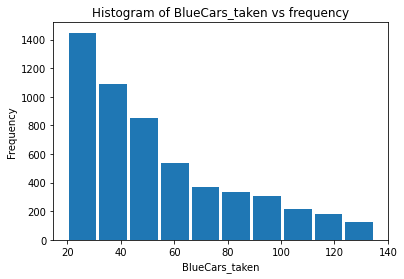

In [ ]:
#Plotting a Blue cars taken histogram
freq_blue_t = autolib_wd['BlueCars_taken_sum']

plt.hist(freq_blue_t, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('BlueCars_taken')
plt.ylabel('Frequency')
plt.title('Histogram of BlueCars_taken vs frequency')
plt.show()

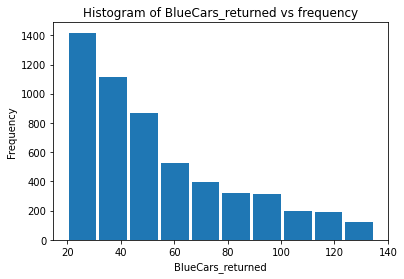

In [ ]:
#Plotting the blue cars returned histogram
freq_blue_t = autolib_wd['BlueCars_returned_sum']

plt.hist(freq_blue_t, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('BlueCars_returned')
plt.ylabel('Frequency')
plt.title('Histogram of BlueCars_returned vs frequency')
plt.show()

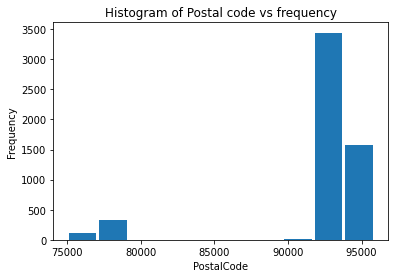

In [ ]:
 #Plotting blue car taken as per different postal addresses histogram
freq_blue_t = autolib_wd['PostalCode']

plt.hist(freq_blue_t, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('PostalCode')
plt.ylabel('Frequency')
plt.title('Histogram of Postal code vs frequency')
plt.show()


### Bivariate Analysis

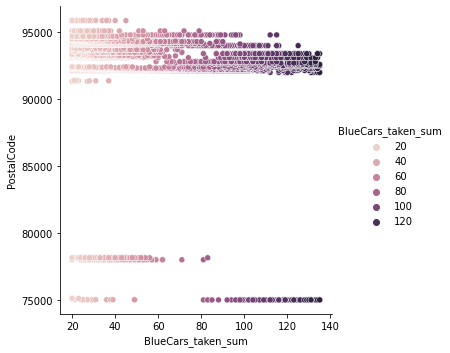

In [ ]:
#  Relationship between the postal address to the blue cars taken
ax = sns.relplot(x="BlueCars_taken_sum", y="PostalCode", hue="BlueCars_taken_sum", data=autolib_wd)

[Text(0, 0.5, 'Date'),
 Text(0.5, 0, 'Cars taken'),
 Text(0.5, 1.0, 'Relationship between BlueCars taken to the rest')]

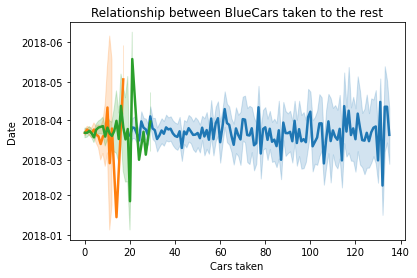

In [ ]:
#  Relationship between the different car sharing systems compared to the blue cars taken 

ax = sns.lineplot(data=autolib_wd, x = autolib_wd['BlueCars_taken_sum'], y = autolib_wd['Date'] ,  palette="tab10", linewidth=2.5)
ax = sns.lineplot(data=autolib_wd, x = autolib_wd['Utilib_taken_sum'], y = autolib_wd['Date'] ,  palette="rocket", linewidth=2.5)
ax = sns.lineplot(data=autolib_wd, x = autolib_wd['Utilib_14_taken_sum'], y = autolib_wd['Date'] ,  palette="seagreen", linewidth=2.5)

ax.set(xlabel='Cars taken', ylabel='Date',
       title='Relationship between BlueCars taken to the rest')

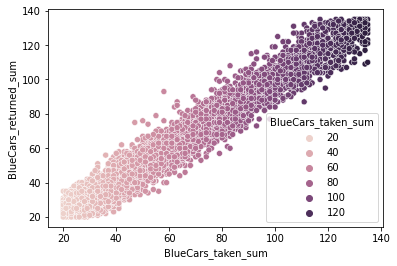

In [ ]:
# Relationship between Blue car taken and blue cars returned
sns.scatterplot(data = autolib, x="BlueCars_taken_sum", y="BlueCars_returned_sum", hue="BlueCars_taken_sum")

#### **Observations** 



*   The rate of taking the blue cars was more or less the same which implies that the conduction of the sharing was quite efficient and the systems put in place are working quite effectively
*  The Locations around postal address 95000 have quite fond reception of the blue car sharing services and use most frequently and those around postal address 17000-17015 are also quite receptive to these services 

  


*   The blue car are also taken the most compared to the Utilib and Utilib 14 this implies that they are quite efficient to the others and therefore the company should focus more resources on getting more slots stations and purchasing more of the blue cars to carter for the growing market demand. 





#### Sampling our Data for the Hypothesis Test

In [ ]:
# Using the random sampling to select the sample population to work with where we selected 100 values to represent our dataon blue cars taken on weekdays
auto = autolib_wd['BlueCars_taken_sum'].sample(n = 100, replace="False")
print(auto)

11070     51
9761     127
15601     79
7753      44
9969     103
        ... 
14364     45
8434      33
14710     26
11579     22
8484      23
Name: BlueCars_taken_sum, Length: 100, dtype: int64


In [ ]:
#  establishing if our samples have a normal distribution using Gaussian Distribution method
# imporing the shapiro function
from scipy.stats import shapiro 
# testing for normality
stat, p = shapiro(auto)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  


Statistics=0.815, p=0.000
Sample does not look Gaussian


In [ ]:
# Sampling our weekend DataSet
autolib_wk = autolib.loc[autolib.Day_type == 'weekend']
autolib_wk.head()

,PostalCode,Date,dayOfWeek,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
94,75001,2018-04-08,6,weekend,119,117,1,1,13,13,29,28
125,75001,2018-05-20,6,weekend,114,120,4,4,3,3,25,26
281,75002,2018-05-20,6,weekend,133,121,1,1,4,2,32,28
1146,75008,2018-02-24,5,weekend,26,22,0,0,3,2,6,5
1302,75009,2018-02-24,5,weekend,27,21,4,3,1,0,9,7


In [ ]:
# Using the random sampling to select the sample population to work with where we selected 100 values to represent our dataon blue cars taken on weekends
auto1 = autolib_wk['BlueCars_taken_sum'].sample(n = 100, replace="False")
print(auto1)

12688    125
14627     95
12963     45
8540      32
5765      94
        ... 
6874      35
5290     107
10837     21
8428      25
14754     38
Name: BlueCars_taken_sum, Length: 100, dtype: int64


In [ ]:
#  establishing if our samples have a normal distribution using Gaussian Distribution method
# imporing the shapiro function
from scipy.stats import shapiro 
# testing for normality
stat, p = shapiro(auto1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  
# Running the example first calculates the test on the data sample, 
# then prints the statistic and calculated p-value. 
# The p-value is interested and finds that the data is likely drawn from a Gaussian distribution.

Statistics=0.918, p=0.000
Sample does not look Gaussian


In [ ]:
m1= mean_1=np.mean(auto)
m2= mean_2=np.mean(auto1)

print(m1, m2)

49.79 63.96


#### Hypothesis Testing

We are trying to investigate if the there is an increase or decrease in the demand of the blue cars between weekends and weekdays.

We are to test the hypothesis and determine if this hypothesis can be rejected or failed to be rejected.

The distribution of our samples is not normal therefore we are discouraged from using z score test to determine our hypothesis therefore we can apply the use of wilcoxon signed rank test as it doesnot need data to follow any parametric procedures.

Our hypothesis as defined earlier:

Null and Alternative hypothesis

Ho: m1 = m2

H1: m1 != m2

We will define our alpha = 0.05 which is a 5% Significance level

In [ ]:
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(auto, auto1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('fail to reject the Null Hypothesis (H0) as the number of bluecars taken during weekdays is similar to mean of bluecars taken during the weekend')
else:
    print('reject Null Hypothesis (H0)  as the number of Mean of bluecars taken during weekdays is different to mean of bluecars taken during the weekend')

Statistics=1478.500, p=0.001
reject Null Hypothesis (H0)  as the number of Mean of bluecars taken during weekdays is different to mean of bluecars taken during the weekend


**Conclusion**

The null hypothesis was rejected therefore we conclude that the alternative hypothesis which was our research question was actually true there is a relationship between the day of the week and the amount of cars blue cars picked



*   There value of significance was 5% but our P value was less that 5 it was at 1% which implied that it did not fall below the confidence level there the mean show that there is an increase of the Blue car sharing during weekends 
*   Therefore the company should make ammends to try and suit the target market on Weekends as there is need for these services more on weekends than weekdays.



